<a href="https://colab.research.google.com/github/mhmdsirajkhan/Customer_Segmentation_KMeans/blob/main/Customer_Segmentation_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset
df = pd.read_csv('Mall_Customers.csv')

# Display the first few rows and check information
print("--- DataFrame Head ---")
print(df.head())
print("\n--- DataFrame Info ---")
df.info()

# Select the two key features for clustering: Annual Income and Spending Score
# We are selecting columns 3 and 4 (index 3 and 4)
X = df.iloc[:, [3, 4]].values

--- DataFrame Head ---
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


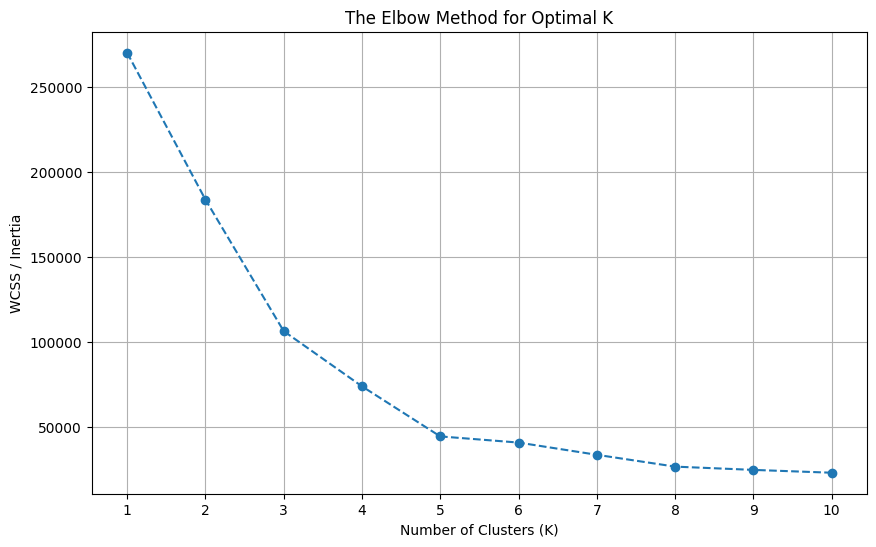


Optimal Number of Clusters (K) is 5.


In [2]:
# 1. Initialize WCSS list
wcss = []

# 2. Loop through 1 to 10 clusters
# We use 'k-means++' initialization to avoid random initialization traps
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    # Append the inertia (WCSS) for the current K value
    wcss.append(kmeans.inertia_)

# 3. Plot the results to visualize the Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS / Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the plot, the 'elbow' (optimal K) should be at K=5.
print("\nOptimal Number of Clusters (K) is 5.")

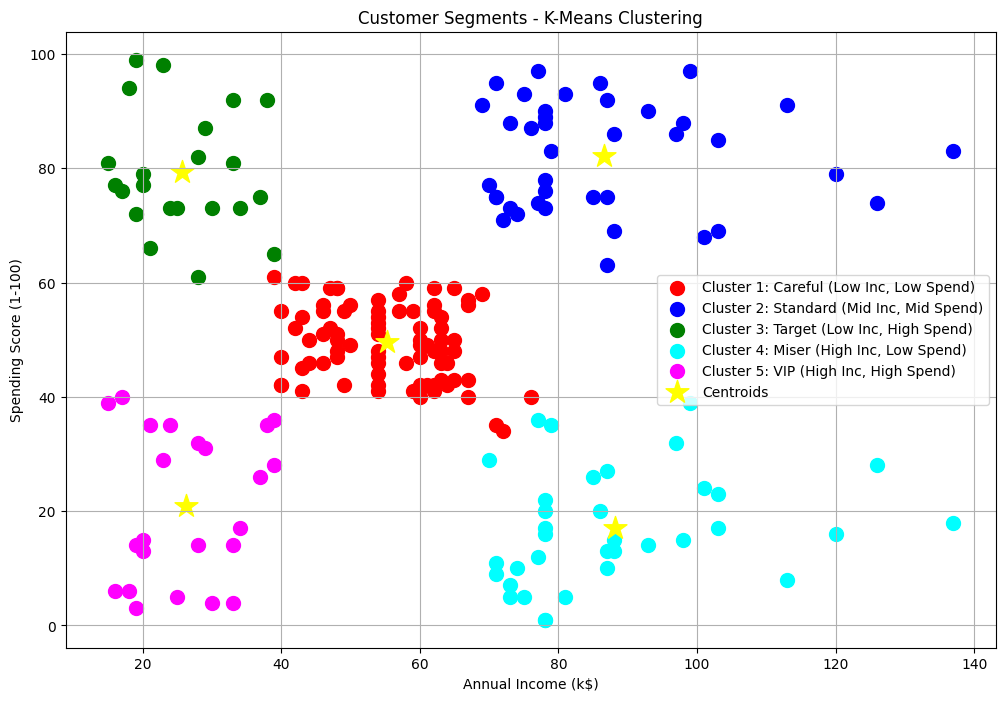


--- Cluster Centroids (Mean Income, Mean Spending) ---
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [3]:
# 1. Initialize and Train the Final K-Means Model with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# The fit_predict method trains the model and assigns a cluster ID (0-4) to each data point
y_kmeans = kmeans.fit_predict(X)

# 2. Visualize the 5 Clusters
plt.figure(figsize=(12, 8))

# Scatter plot each cluster separately for distinct colors and labels
# X[y_kmeans == i, 0] is the Annual Income for customers in cluster i
# X[y_kmeans == i, 1] is the Spending Score for customers in cluster i
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1: Careful (Low Inc, Low Spend)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2: Standard (Mid Inc, Mid Spend)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3: Target (Low Inc, High Spend)')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4: Miser (High Inc, Low Spend)')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5: VIP (High Inc, High Spend)')

# Plot the cluster centroids (the center point of each group)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='*')

plt.title('Customer Segments - K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Print the center of each cluster for confirmation
print("\n--- Cluster Centroids (Mean Income, Mean Spending) ---")
print(kmeans.cluster_centers_)